In [9]:
using Plots
using Random
using LinearAlgebra
using LaTeXStrings

Set parameters

In [10]:
a₁ = 1;
a₂ = 2;
a₃ = 3;
a₄ = 4;

Solve OLS problem for different levels of multicolinearity and show prediction and parameter errors

ERROR: syntax error
ERROR: syntax error
ERROR: syntax error
ERROR: syntax error
ERROR: syntax error
ERROR: syntax error
ERROR: syntax error
ERROR: syntax error
ERROR: syntax error
ERROR: syntax error
ERROR: syntax error
ERROR: syntax error
ERROR: syntax error
ERROR: syntax error
ERROR: syntax error
ERROR: syntax error
ERROR: syntax error
ERROR: syntax error
ERROR: syntax error
ERROR: syntax error
ERROR: syntax error
ERROR: syntax error
ERROR: syntax error
ERROR: syntax error
ERROR: syntax error
ERROR: syntax error
ERROR: syntax error
ERROR: syntax error
ERROR: syntax error
ERROR: syntax error
ERROR: syntax error
ERROR: syntax error
ERROR: syntax error
ERROR: syntax error
ERROR: syntax error
ERROR: syntax error
ERROR: syntax error
ERROR: syntax error
ERROR: syntax error
ERROR: syntax error
ERROR: syntax error
ERROR: syntax error
ERROR: syntax error
ERROR: syntax error
ERROR: syntax error
ERROR: syntax error
ERROR: syntax error
ERROR: syntax error
ERROR: syntax error
ERROR: syntax error


┌ Info: Saved animation to c:\Users\Oliver\Downloads\OLS_multicolinearity.gif
└ @ Plots C:\Users\Oliver\.julia\packages\Plots\9Q9pN\src\animation.jl:156
ror
ERROR: syntax error
ERROR: syntax error
ERROR: syntax error
ERROR: syntax error
ERROR: syntax error


Plots.AnimatedGif("c:\\Users\\Oliver\\Downloads\\OLS_multicolinearity.gif")
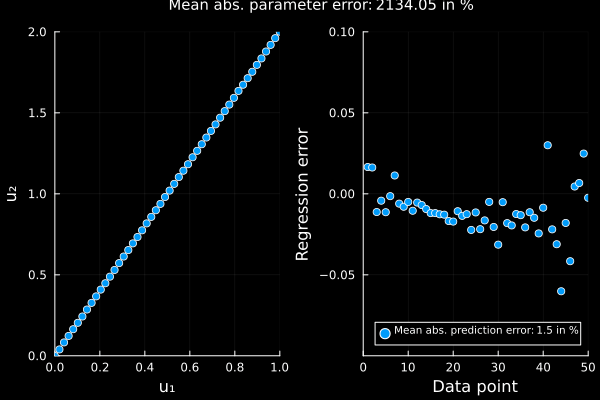

In [14]:
u₁ = LinRange(0, 1, 50); # 50 evenly spaced points between 0 and 1
noise_gain = exp10.(LinRange(-3, 0, 30)) # 30 evenly spaced points between 10^-3 and 1

anim = @animate for ii = 1:length(noise_gain) # loop over all noise gains
    u₂ = 2 * u₁ .+ noise_gain[ii]*randn(length(u₁)) # create u₂ with noise (noise will decrease level of multicolinearity)

    Y = a₁ * u₁ + a₂ * u₂ + a₃ * u₁.^2 + a₄ * u₂.^2 + 0.1*randn(length(u₁)) # create Y with noise
    Z = [u₁ u₂ u₁.^2 u₂.^2] # create regressor matrix
    w = Z\Y # estimate parameters (quick OLS solution macro)

    # Subplots of u₁ vs u₂ plus regression error vs data points
    plot(scatter(u₁, u₂, legend=false, xlabel="u₁", 
    ylabel="u₂", xlims=(0, 1), ylim=(0,2), background_color="#000000"), 
    scatter(Z*[a₁; a₂; a₃; a₄] - Z*w, legend=:bottomright, 
    legendfontsize=7, 
    label=L"Mean abs. prediction error:$ $ %$(round(sum(abs.(Z*[a₁; a₂; a₃; a₄] - Z*w))/length(Y)*100; digits=1)) in %", 
    xlabel="Data point", 
    ylabel="Regression error", 
    xlims=(0, 50), ylim=(-0.1,0.1), background_color="#000000"), 
    plot_title=L"Mean abs. parameter error:$ $ %$(round(sum(abs.([a₁; a₂; a₃; a₄] - w))/4*100; digits=2)) in %", 
    plot_titlefontcolor=:white, plot_titlefontsize=10,
    background_color="#000000")
end

gif(anim, "OLS_multicolinearity.gif", fps = 1) # play animation as gif

Evaluate level of multicolinearity using condition number of Z'*Z

In [12]:
w_hat = zeros(20,100,4) # pre-init identified parameters
w_err = zeros(20,100,4) # pre-init parameter errors
w_err_mean = zeros(20,100) # pre-init mean parameter errors
data_cond = zeros(20,100) # pre-init data condition numbers

for ii = 1:20
    for jj = 1:100
        u₂ = 2 * u₁ .+ float(2)^(-ii+1).*randn(length(u₁)) # create u₂ with noise (noise will decrease level of multicolinearity)

        Y = a₁ * u₁ + a₂ * u₂ + a₃ * u₁.^2 + a₄ * u₂.^2 + 0.1*randn(length(u₁)) # create Y with noise
        Z = [u₁ u₂ u₁.^2 u₂.^2] # create regressor matrix

        w_hat[ii, jj, :] = Z\Y # estimate parameters (quick OLS solution macro)
        w_err[ii, jj, :] = [a₁; a₂; a₃; a₄] - w_hat[ii, jj, :] # calculate parameter errors
        w_err_mean[ii, jj] = sum(abs.(w_err[ii, jj, :]./[a₁; a₂; a₃; a₄]))/4*100 # calculate mean parameter error
        data_cond[ii, jj] = cond(Z'*Z) # calculate data condition number
    end
end



Plot results in double logarithmic scale

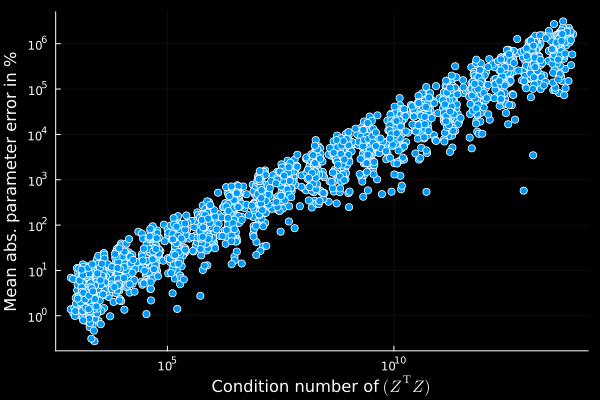

In [13]:
scatter(data_cond[:], w_err_mean[:], legend=false, 
xlabel=L"Condition number of $(Z^\mathrm{T}Z)$", 
ylabel="Mean abs. parameter error in %", 
yscale=:log10, xscale=:log10, 
background_color="#000000")